In [1]:
%config Completer.use_jedi =False

# Computando a trajetória do acúmulo de capital com o tempo apresentado na forma Quantecon

In [22]:
class Solow:
    """ k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)"""
    
    def __init__(self,n = 0.05,δ = 0.1,α = 0.3,s = 0.25,k=1):
        self.n = n
        self.δ = δ
        self.α = α
        self.s = s
        self.k = k
    def h(self):
        return [self.s * self.k **self.α + (1-self.δ)*self.k]/(1+self.n)
    
    def update(self):
        self.k = self.h()
    def steady(self):
        return (self.s/(self.n + self.δ))**(1/(1-self.α))
    def trajetoria(self,t):
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path
        
        
        

In [37]:
class Solowqe:
    
    def __init__(self, n=0.05, # population growth rate
                       s=0.25, # savings rate
                       δ=0.1, # depreciation rate
                       α=0.3, # share of labor
                       z=2.0, # productivity
                       k=1.0): # current capital stock
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k
    def h(self):

    # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
    # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)
    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k = self.h()
    def steady_state(self):
        "Compute the steady state value of capital."
    # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
    # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))
    def generate_sequence(self, t):
        
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
s1 = Solowqe()
s2 = Solowqe(k=8.0)
T = 60

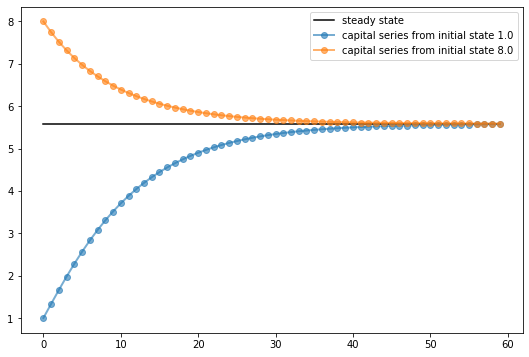

In [56]:
fig, ax = plt.subplots(figsize=(9, 6))
# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')
        # Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)
ax.legend()
plt.show()